In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df.shape

(1093, 9)

In [5]:
#checking for NaN values
df.isnull().any().sum()

1

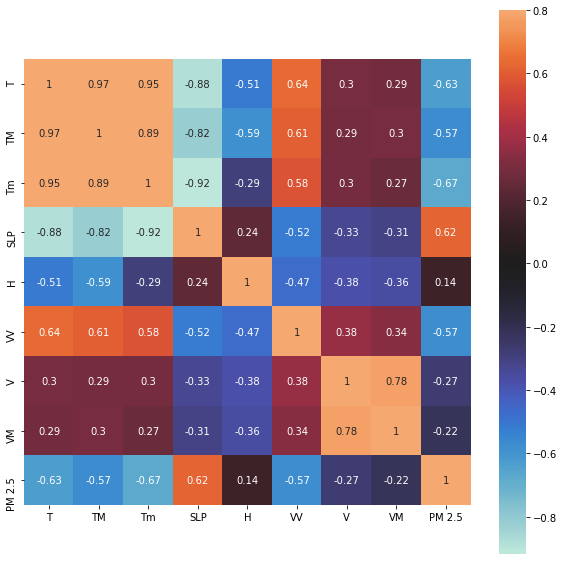

In [8]:
corrmat=df.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(corrmat,center=0,vmax=.8,square=True,annot=True)
plt.show()

In [9]:
# One NULL value found hence dropping it
df=df.dropna()

In [10]:
df.isnull().any()

T         False
TM        False
Tm        False
SLP       False
H         False
VV        False
V         False
VM        False
PM 2.5    False
dtype: bool

In [11]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [12]:
df['PM 2.5'].value_counts()

0.000000      36
79.833333      7
29.666667      7
43.666667      7
108.000000     7
              ..
121.208333     1
19.541667      1
231.125000     1
25.791667      1
32.583333      1
Name: PM 2.5, Length: 555, dtype: int64

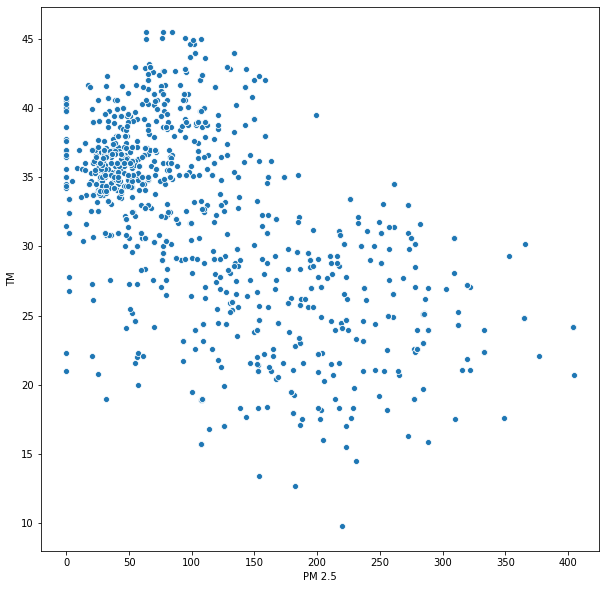

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="PM 2.5", y="TM",data=df)

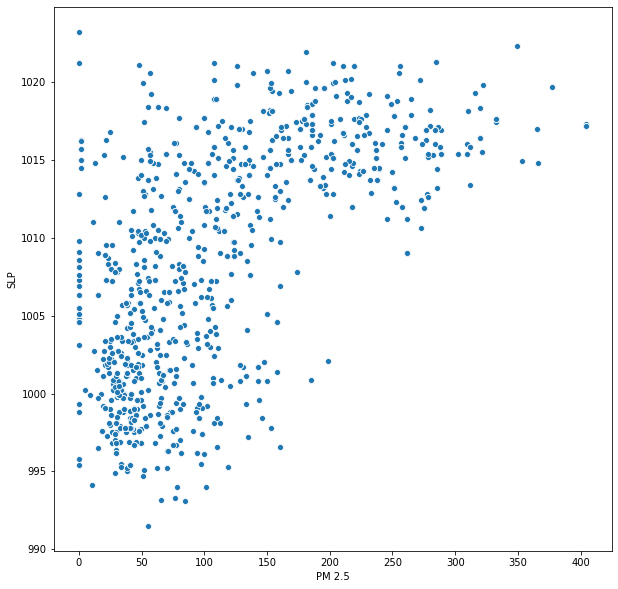

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="PM 2.5", y="SLP",data=df)

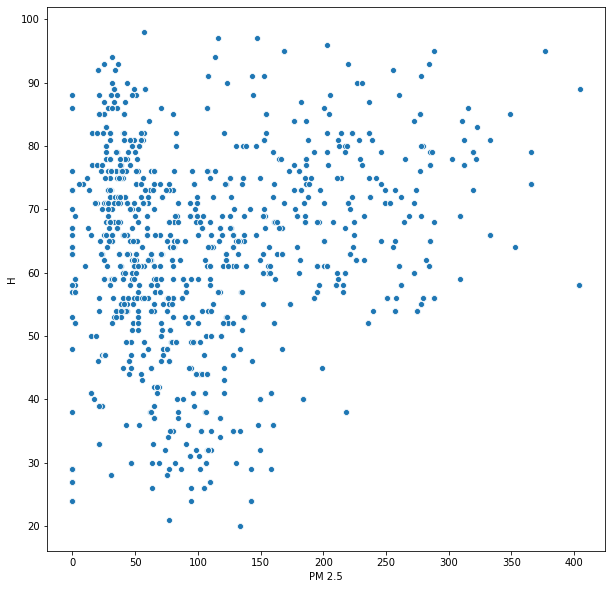

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="PM 2.5", y="H",data=df)

In [12]:
X=df.iloc[:,:-1] 
y=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [20]:
model = Sequential()
# input layer
model.add(Dense(128,  activation='relu'))
#model.add(Dropout(0.2))

# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='linear'))

# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [21]:
model.fit(X_train, 
          y_train, 
          epochs=150,
          batch_size=256,
          validation_split=0.30
          #validation_data=(X_test, y_test), 
          )

Epoch 1/150

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3/3 [==============================] - 1s 218ms/step - loss: 110.1456 - mean_absolute_error: 110.1456 - val_loss: 106.2004 - val_mean_absolute_error: 106.2004
Epoch 2/150
3/3 [==============================] - 0s 79ms/step - loss: 109.4879 - mean_absolute_error: 109.4879 - val_loss: 105.3706 - val_mean_absolute_error: 105.3706
Epoch 3/150
3/3 [==============================] - 0s 82ms/step - loss: 108.5510 - mean_absolute_error: 108.5510 - val_loss: 104.1369 - val_mean_absolute_error: 104.13

Epoch 46/150
3/3 [==============================] - 0s 42ms/step - loss: 45.2980 - mean_absolute_error: 45.2980 - val_loss: 41.1905 - val_mean_absolute_error: 41.1905
Epoch 47/150
3/3 [==============================] - 0s 33ms/step - loss: 45.4109 - mean_absolute_error: 45.4109 - val_loss: 41.0688 - val_mean_absolute_error: 41.0688
Epoch 48/150
3/3 [==============================] - 0s 31ms/step - loss: 44.5371 - mean_absolute_error: 44.5371 - val_loss: 41.1263 - val_mean_absolute_error: 41.1263
Epoch 49/150
3/3 [==============================] - 0s 30ms/step - loss: 44.4369 - mean_absolute_error: 44.4369 - val_loss: 41.3870 - val_mean_absolute_error: 41.3870
Epoch 50/150
3/3 [==============================] - 0s 29ms/step - loss: 45.2016 - mean_absolute_error: 45.2016 - val_loss: 41.1639 - val_mean_absolute_error: 41.1639
Epoch 51/150
3/3 [==============================] - 0s 29ms/step - loss: 44.2780 - mean_absolute_error: 44.2780 - val_loss: 40.7344 - val_mean_absolute_error: 40.734

3/3 [==============================] - 0s 57ms/step - loss: 41.6406 - mean_absolute_error: 41.6406 - val_loss: 36.9627 - val_mean_absolute_error: 36.9627
Epoch 96/150
3/3 [==============================] - 0s 56ms/step - loss: 40.7506 - mean_absolute_error: 40.7506 - val_loss: 36.7683 - val_mean_absolute_error: 36.7683
Epoch 97/150
3/3 [==============================] - 0s 44ms/step - loss: 41.1727 - mean_absolute_error: 41.1727 - val_loss: 36.6428 - val_mean_absolute_error: 36.6428
Epoch 98/150
3/3 [==============================] - 0s 43ms/step - loss: 41.4115 - mean_absolute_error: 41.4115 - val_loss: 36.7561 - val_mean_absolute_error: 36.7561
Epoch 99/150
3/3 [==============================] - 0s 53ms/step - loss: 41.2884 - mean_absolute_error: 41.2884 - val_loss: 36.6098 - val_mean_absolute_error: 36.6098
Epoch 100/150
3/3 [==============================] - 0s 33ms/step - loss: 40.8168 - mean_absolute_error: 40.8168 - val_loss: 36.4592 - val_mean_absolute_error: 36.4592
Epoch 101/

Epoch 144/150
3/3 [==============================] - 0s 30ms/step - loss: 39.7941 - mean_absolute_error: 39.7941 - val_loss: 34.8379 - val_mean_absolute_error: 34.8379
Epoch 145/150
3/3 [==============================] - 0s 34ms/step - loss: 39.6508 - mean_absolute_error: 39.6508 - val_loss: 34.8150 - val_mean_absolute_error: 34.8150
Epoch 146/150
3/3 [==============================] - 0s 35ms/step - loss: 39.8174 - mean_absolute_error: 39.8174 - val_loss: 34.8745 - val_mean_absolute_error: 34.8745
Epoch 147/150
3/3 [==============================] - 0s 33ms/step - loss: 38.8996 - mean_absolute_error: 38.8996 - val_loss: 36.0317 - val_mean_absolute_error: 36.0317
Epoch 148/150
3/3 [==============================] - 0s 28ms/step - loss: 39.4502 - mean_absolute_error: 39.4502 - val_loss: 34.9206 - val_mean_absolute_error: 34.9206
Epoch 149/150
3/3 [==============================] - 0s 33ms/step - loss: 39.5261 - mean_absolute_error: 39.5261 - val_loss: 34.9715 - val_mean_absolute_error: 

In [30]:
model.save("ANN1.h5")

In [31]:
val_loss, val_mean_absolute_error= model.evaluate(X_test, y_test)
print(val_loss, val_mean_absolute_error)

7/7 [==============================] - 0s 2ms/step - loss: 34.1502 - mean_absolute_error: 34.1502
34.15023422241211 34.15023422241211


In [32]:
losses = pd.DataFrame(model.history.history)

In [33]:
predictions = model.predict_classes(X_test)


In [34]:
from sklearn import metrics
prediction=model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 34.15023303735928
MSE: 2511.0025628016947
RMSE: 50.10990483728436


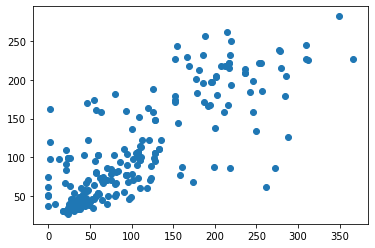

In [35]:
plt.scatter(y_test,prediction)

In [1]:
import pickle 

In [2]:
#pickle.dump(model,open('ANN1.pkl' , 'wb'))

NameError: name 'model' is not defined

In [28]:
#import dill

In [5]:
"""dill_file = open("ANN1_resultstatsDF", "wb")
dill_file.write(dill.dumps(resultstatsDF))
dill_file.close()"""

'dill_file = open("ANN1_resultstatsDF", "wb")\ndill_file.write(dill.dumps(resultstatsDF))\ndill_file.close()'

In [36]:
import joblib

In [37]:
joblib.dump(scaler, 'model1.pkl')

['model1.pkl']

In [3]:
from keras.models import load_model
import joblib
import numpy as np

a_model = load_model('ANN1.h5')
a_scaler = joblib.load("model1.pkl")